## M3 Question 1

### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
# Detect the encoding of the file
with open('Data/csv-1700-1830.csv', 'rb') as f:
    result = chardet.detect(f.read())
    encoding = result['encoding']

# Load in data
df1 = pd.read_csv("Data/csv-1700-1830.csv", encoding=encoding)
df2 = pd.read_csv("Data/csv-1831-2000.csv", encoding=encoding)
df3 = pd.read_csv("Data/csv-2001-2131.csv", encoding=encoding)

# Combine into one df
df = pd.concat([df1, df2, df3]) 

# Save combined data
df.to_csv('Data/combined_raw.csv', index=False)

In [3]:
# Convert date to datetime format
df['date'] = pd.to_datetime(df['date(yyyyMMddHHmmss)'], format='%Y%m%d%H%M%S')
df.head()

,type,date(yyyyMMddHHmmss),author,message,latitude,longitude,location,date
0,mbdata,20140123170000,POK,Follow us @POK-Kronos,NaN,NaN,NaN,2014-01-23 17:00:00
1,mbdata,20140123170000,maha_Homeland,Don't miss a moment! Follow our live coverage...,NaN,NaN,NaN,2014-01-23 17:00:00
2,mbdata,20140123170000,Viktor-E,Come join us in the Park! Music tonight at Abi...,NaN,NaN,NaN,2014-01-23 17:00:00
3,mbdata,20140123170000,KronosStar,POK rally to start in Abila City Park. POK lea...,NaN,NaN,NaN,2014-01-23 17:00:00
4,mbdata,20140123170000,AbilaPost,POK rally set to take place in Abila City Park...,NaN,NaN,NaN,2014-01-23 17:00:00


/var/folders/ph/x9pdm2qs47dfr1_5j9wz8ng40000gn/T/ipykernel_95937/1767801861.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  bin_edges = pd.date_range('2014-01-23 17:00:00', '2014-01-23 22:00:00', freq='H')


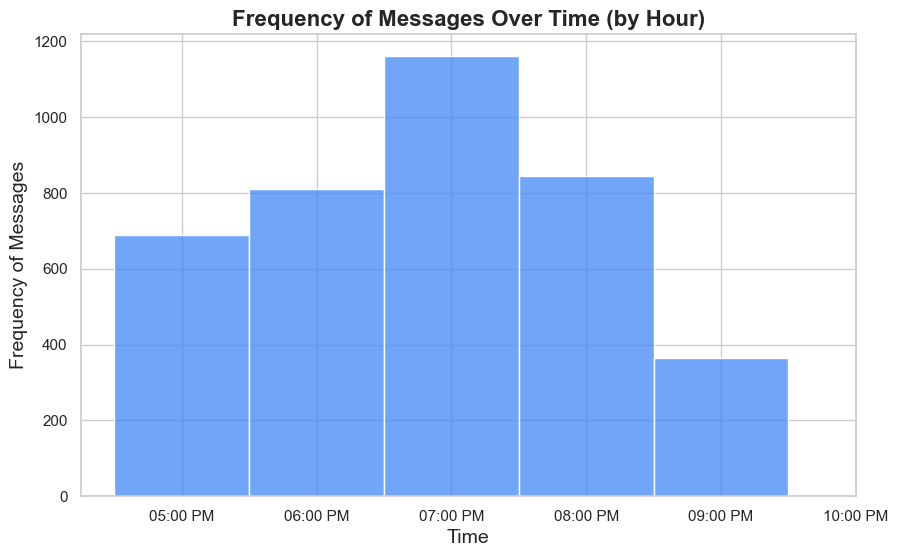

In [4]:
# Frequency of messages over time (mbdata) 
# Group by hour
df['hour'] = df['date'].dt.hour 

# Create histogram
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bin_edges = pd.date_range('2014-01-23 17:00:00', '2014-01-23 22:00:00', freq='H')
sns.histplot(df[df['type'] == 'mbdata']['hour'], bins=bin_edges.hour, color='#4287f5', kde=False)

# Labels & title
plt.title('Frequency of Messages Over Time (by Hour)', fontsize=16, weight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Frequency of Messages', fontsize=14)
formatted_ticks = [tick.strftime('%I:%M %p') for tick in bin_edges]
plt.xticks([17.5, 18.5, 19.5, 20.5, 21.5, 22.5], formatted_ticks)
plt.grid(True)
plt.show()

/var/folders/ph/x9pdm2qs47dfr1_5j9wz8ng40000gn/T/ipykernel_95937/2232974702.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  bin_edges = pd.date_range('2014-01-23 17:00:00', '2014-01-23 22:00:00', freq='H')


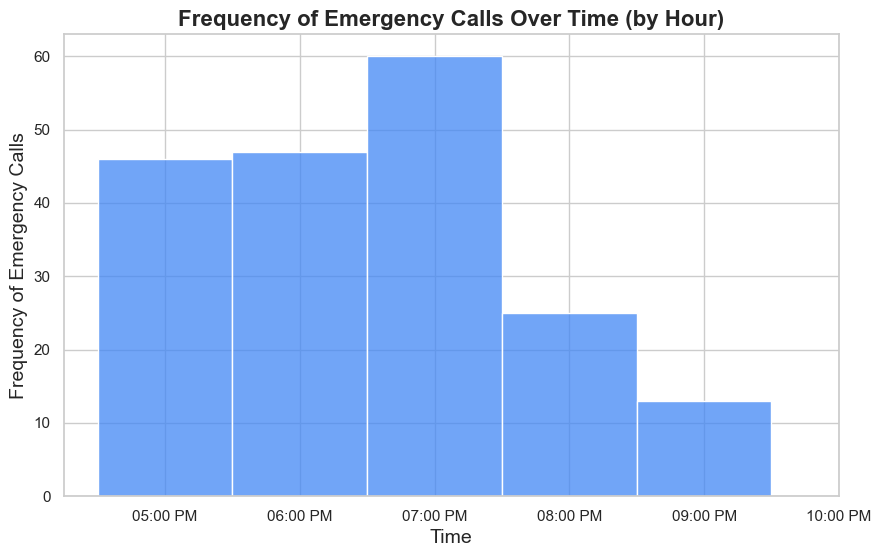

In [5]:
# Frequency of calls over time (ccdata) 

# Create histogram
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
bin_edges = pd.date_range('2014-01-23 17:00:00', '2014-01-23 22:00:00', freq='H')
sns.histplot(df[df['type'] == 'ccdata']['hour'], bins=bin_edges.hour, color='#4287f5', kde=False)

# Labels & title
plt.title('Frequency of Emergency Calls Over Time (by Hour)', fontsize=16, weight='bold')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Frequency of Emergency Calls', fontsize=14)
formatted_ticks = [tick.strftime('%I:%M %p') for tick in bin_edges]
plt.xticks([17.5, 18.5, 19.5, 20.5, 21.5, 22.5], formatted_ticks)
plt.grid(True)
plt.show()

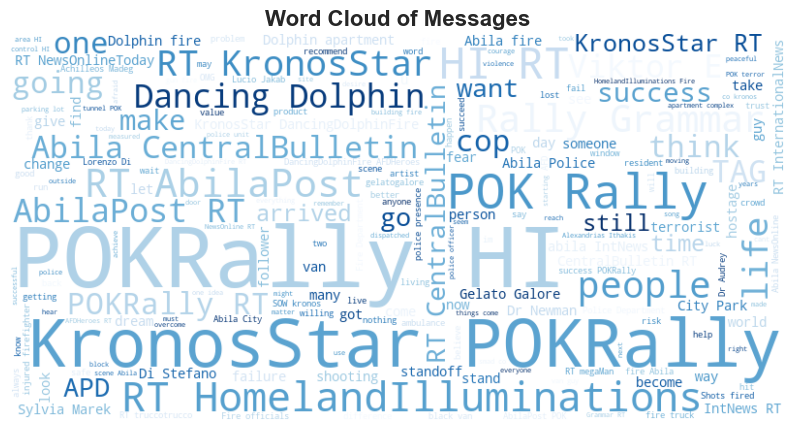

In [6]:
# Overall word cloud from mbdata
# Combine all messages into one string
all_mbdata = " ".join(df[df['type'] == 'mbdata']['message'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(all_mbdata)

# Plot the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title('Word Cloud of Messages', fontsize=16, weight='bold')
plt.show()